In [62]:
import pandas as pd

<H1>DATA PROCESSING</H1>

In [63]:
#read data
df = pd.read_csv('train.csv', header=0)
df_test = pd.read_csv('test.csv',header=0) 

        

In [64]:
# extract and merge index for the train data
ind2 = df["V1"]==2 
ind3 = df["V1"]==3
ind2n3 = ind2 | ind3


In [65]:
# extract and merge index for the test data
ind2_test = df_test["V1"]==2 
ind3_test = df_test["V1"]==3
ind2n3_test = ind2_test | ind3_test
df = df.drop(df.index[-ind2n3])
df_test = df_test.drop(df_test.index[-ind2n3_test])

In [66]:
df


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257
4,3,-1.000,-1.000,-1.000,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.0,-1.0
6,3,-1.000,-1.000,-1.000,-0.830,0.442,1.000,1.000,0.479,-0.328,...,1.000,0.671,0.345,-0.507,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0
26,3,-1.000,-1.000,-1.000,-1.000,-1.000,-0.104,0.549,0.579,0.579,...,0.388,0.579,0.811,1.000,1.000,0.715,0.107,-0.526,-1.0,-1.0
30,3,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.107,1.000,1.000,...,-0.280,0.322,0.813,1.000,1.000,0.633,-0.144,-0.994,-1.0,-1.0
35,3,-1.000,-1.000,-1.000,-1.000,-0.674,0.492,0.573,0.755,-0.018,...,0.537,1.000,1.000,0.689,-0.530,-1.000,-1.000,-1.000,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7282,3,-1.000,-0.882,-0.334,0.267,0.333,0.749,1.000,1.000,1.000,...,0.968,1.000,1.000,1.000,0.809,0.325,-0.820,-1.000,-1.0,-1.0
7283,3,-0.985,-0.048,0.226,0.226,0.226,-0.355,-0.807,-1.000,-0.726,...,-0.307,-0.555,-0.555,-0.555,-0.556,-1.000,-1.000,-1.000,-1.0,-1.0
7286,3,-1.000,-1.000,-1.000,-0.988,-0.527,-0.208,0.620,1.000,0.467,...,-0.116,0.899,0.416,-0.510,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0
7287,3,-1.000,-1.000,-1.000,-0.990,0.708,0.557,0.347,-0.107,-0.758,...,0.697,0.636,0.167,-0.968,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0


In [67]:
#seperate Train Y and Test Y from the data
Train_Y=df["V1"]
Test_Y=df_test["V1"]
df.drop("V1",inplace = True,axis=1)
df_test.drop("V1",inplace = True,axis=1)

In [122]:
Train_X=df
Test_X=df_test


<H1>Linear_MODEL</H1>

In [69]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [83]:
# make Linear model and predicted Y
model = LinearRegression()
model.fit(Train_X, Train_Y)
pre_Y_Train = model.predict(Train_X)
pre_Y= model.predict(Test_X)

In [74]:
from sklearn.metrics import mean_squared_error, r2_score

In [84]:
mean_squared_error(Test_Y,pre_Y)
print("TEST R2 score : %.2f" % r2_score(Test_Y,pre_Y))
print("TEST MSE score : %.2f" % mean_squared_error(Test_Y,pre_Y))
print("TRAIN R2 score : %.2f" % r2_score(Train_Y,pre_Y_Train))
print("TRAIN MSE score : %.2f" % mean_squared_error(Train_Y,pre_Y_Train))


TEST R2 score : 0.39
TEST MSE score : 0.15
TRAIN R2 score : 0.90
TRAIN MSE score : 0.02


<H1>KNN</H1>

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [82]:
from sklearn.neighbors import KNeighborsClassifier
TEST_MSE = []
TEST_R2 = []
TRAIN_MSE = []
TRAIN_R2 = []
# Calculating error for K values between 1 and 40
for i in range(1, 15,2):
    #print(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Train_X, Train_Y)
    pred_i = knn.predict(Test_X)
    pred_i_tr= knn.predict(Train_X)
    #error.append(np.mean(pred_i != Test_Y))
    TEST_MSE.append(mean_squared_error(Test_Y,pred_i))
    TEST_R2.append(r2_score(Test_Y,pred_i))
    TRAIN_MSE.append(mean_squared_error(Train_Y,pred_i_tr))
    TRAIN_R2.append(r2_score(Train_Y,pred_i_tr))
    
    

Text(0, 0.5, 'MSE')

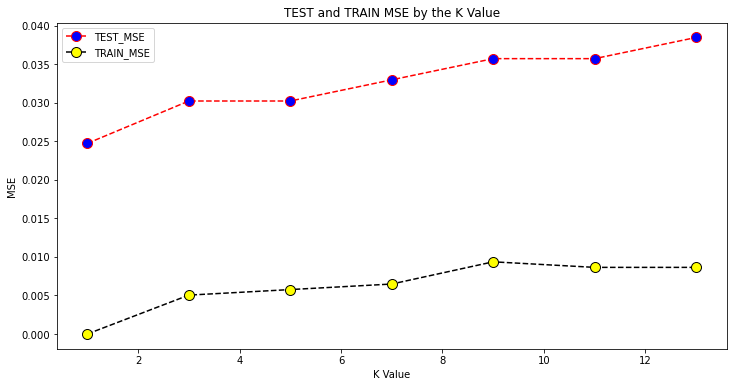

In [105]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15,2), TEST_MSE, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(range(1, 15,2), TRAIN_MSE, color='black', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.legend(['TEST_MSE','TRAIN_MSE'])
plt.title('TEST and TRAIN MSE by the K Value')

plt.xlabel('K Value')
plt.ylabel('MSE')

Text(0, 0.5, 'R2')

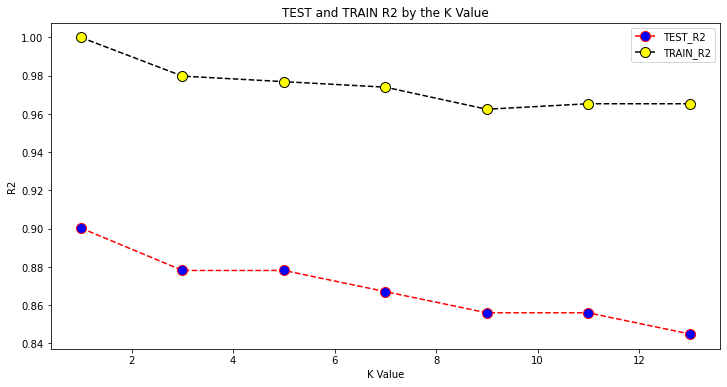

In [130]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15,2), TEST_R2, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(range(1, 15,2), TRAIN_R2, color='black', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)

plt.legend(['TEST_R2','TRAIN_R2'])
plt.title('TEST and TRAIN R2 by the K Value')

plt.xlabel('K Value')
plt.ylabel('R2')

In [134]:
print('TEST_MSE_KNN_Value_1:',round(TEST_MSE[0],5))
print('TEST_R2_KNN_Value_1:',round(TEST_R2[0],5))
print('TEST_MSE_KNN_Value_15:',round(TEST_MSE[6],5))
print('TEST_R2_KNN_Value_15:',round(TEST_R2[6],5))
print("TEST R2 score : %.2f" % r2_score(Test_Y,pre_Y))
print("TEST MSE score : %.2f" % mean_squared_error(Test_Y,pre_Y))

TEST_MSE_KNN_Value_1: 0.02473
TEST_R2_KNN_Value_1: 0.90033
TEST_MSE_KNN_Value_15: 0.03846
TEST_R2_KNN_Value_15: 0.84496
TEST R2 score : 0.39
TEST MSE score : 0.15


In [133]:
print('TRAIN_MSE_KNN_Value_1:',round(TRAIN_MSE[0],5))
print('TRAIN_R2_KNN_Value_1:',round(TRAIN_R2[0],5))
print('TRAIN_MSE_KNN_Value_15:',round(TRAIN_MSE[6],5))
print('TRAIN_R2_KNN_Value_15:',round(TRAIN_R2[6],5))
print("TRAIN MSE score : %.2f" % mean_squared_error(Train_Y,pre_Y_Train))
print("TRAIN R2 score : %.2f" % r2_score(Train_Y,pre_Y_Train))


TRAIN_MSE_KNN_Value_1: 0.0
TRAIN_R2_KNN_Value_1: 1.0
TRAIN_MSE_KNN_Value_15: 0.00864
TRAIN_R2_KNN_Value_15: 0.96535
TRAIN MSE score : 0.02
TRAIN R2 score : 0.90
